<a href="https://colab.research.google.com/github/kabbo12012000/AiRoadMap/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [38]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [39]:
len(x_train)

60000

In [40]:
x_train.shape

(60000, 28, 28)

In [41]:
x_train = (x_train/255-.5)*2
x_test = (x_test/255-.5)*2

In [45]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [46]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [47]:

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history  = model.fit(x_train,y_train, epochs=10 ,validation_split=.5)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7999 - loss: 0.6351 - val_accuracy: 0.9255 - val_loss: 0.2413
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9334 - loss: 0.2091 - val_accuracy: 0.9513 - val_loss: 0.1622
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9532 - loss: 0.1433 - val_accuracy: 0.9501 - val_loss: 0.1673
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9625 - loss: 0.1196 - val_accuracy: 0.9578 - val_loss: 0.1451
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9688 - loss: 0.0990 - val_accuracy: 0.9550 - val_loss: 0.1569
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9727 - loss: 0.0863 - val_accuracy: 0.9577 - val_loss: 0.1555
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9742 - loss: 0.0783 - val_accuracy: 0.9628 - val_loss: 0.1312
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9811 - loss: 0.0627 - val_accuracy: 0.

In [49]:
loss,accuracy = model.evaluate(x_test,y_test)
print("Accuracy is: ",accuracy*100)
print("Loss is : ",loss*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9638 - loss: 0.1497
Accuracy is:  96.95000052452087
Loss is :  12.03838363289833


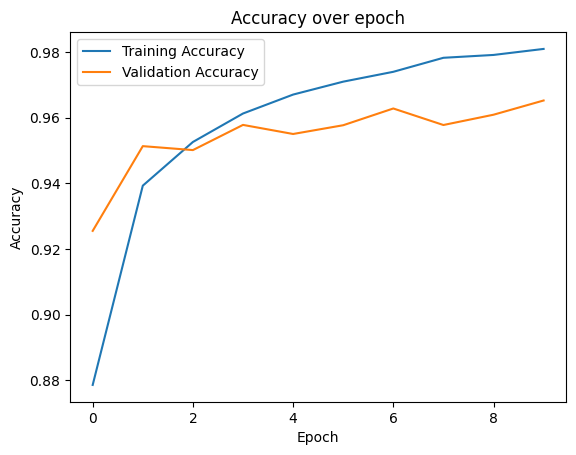

In [50]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [57]:
import numpy as np

single_image = x_test[6]
single_image_label = to_categorical(y_test[6])



prediction = model.predict(np.expand_dims(single_image, axis=0))

print(prediction)

predicted_class = np.argmax(prediction[0])

print(single_image_label)
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[6.4857154e-08 8.6696737e-06 6.2237994e-08 2.1330097e-06 9.9130261e-01
  8.1808628e-07 3.4183989e-07 2.6950136e-05 7.4990862e-04 7.9085100e-03]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
4
